In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#module utile pour la separation en données d'entrainement et de test
from sklearn.linear_model import LinearRegression
#pour avoir acces à linearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
from joblib import dump

In [23]:
df=pd.read_csv('height_weight_dataset.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [24]:
df['Height']=df['Height']*2.54
df['Weight']=df['Weight']*0.45
print(df.head())
df.describe()

  Gender      Height      Weight
0   Male  187.571423  108.852103
1   Male  174.706036   73.039713
2   Male  188.239668   95.733385
3   Male  182.196685   99.019112
4   Male  177.499761   92.857410


,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,72.648161
std,9.772721,14.448798
min,137.828359,29.115057
25%,161.304276,61.118123
50%,168.447898,72.545817
75%,175.702625,84.226286
max,200.656806,121.495364


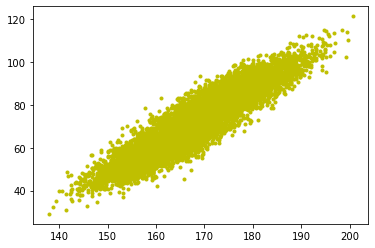

In [25]:
df['Gender'].value_counts()
x=df['Height']
y=df['Weight']
plt.plot(x,y,'y.')

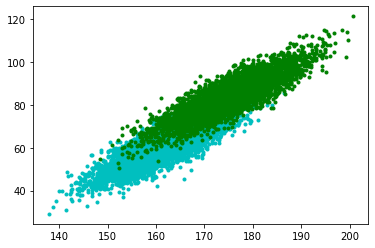

In [26]:
xm=df[df['Gender']=='Male']['Height']
ym=df[df['Gender']=='Male']['Weight']
xf=df[df['Gender']=='Female']['Height']
yf=df[df['Gender']=='Female']['Weight']
#plt.plot(xm,ym,'g.',xf,yf,'c.')
plt.plot(xf,yf,'c.',xm,ym,'g.')

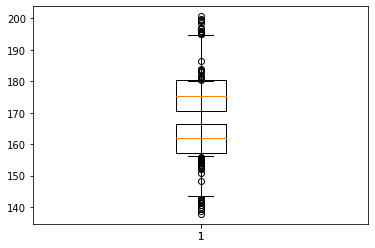

In [27]:
plt.boxplot(df[df['Gender']=='Male']['Height'])
plt.boxplot(df[df['Gender']=='Female']['Height'])
plt.show()
#les données sont concentrées autour de la moyenne
#on a une bonne distribution

<AxesSubplot:title={'center':'Height'}, xlabel='[Gender]'>

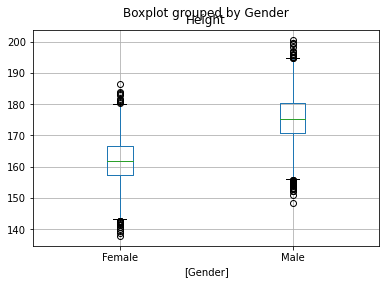

In [28]:
df[['Gender','Height']].boxplot(by='Gender')

In [29]:
#caractéristion: les hommes sont plus élancés et plus gros

<AxesSubplot:title={'center':'Weight'}, xlabel='[Gender]'>

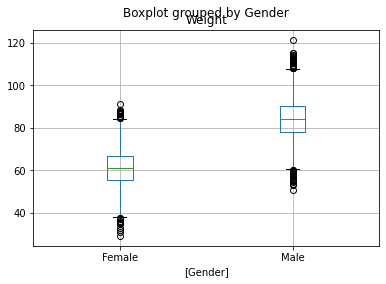

In [30]:
df[['Gender','Weight']].boxplot(by='Gender')

<function matplotlib.pyplot.show(close=None, block=None)>

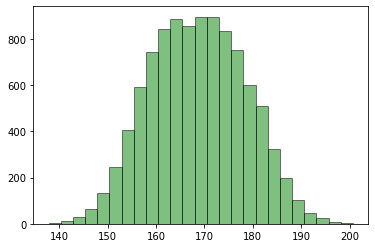

In [31]:
plt.hist(df['Height'],bins=25,color='green',alpha=0.5,edgecolor='black')
plt.show
#la mojorité a une taille entre 1m60 et 1m80
#c'est la distribution  donc pas de skew données ne sont pas distribués symétriquement sur les côtés gauche et droit de la médiane.


<function matplotlib.pyplot.show(close=None, block=None)>

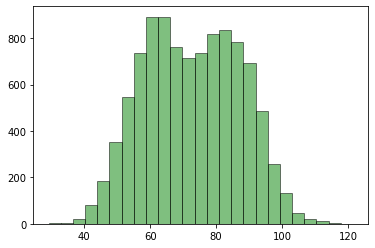

In [32]:
plt.hist(df['Weight'],bins=25,color='green',alpha=0.5,edgecolor='black')
plt.show
#skew positive car un peu penché vers la gauche

In [33]:
df['Height'].std()

def moy(liste):
 moyenne=sum(x)/len(x)
 return moyenne

In [34]:
def variance(liste):
  listevar=[]
  e=0
  mean=moy(liste)
  for i in range(len(liste)):
    e=(liste[i]-mean)**2
    listevar.append(e)
  var=sum(listevar)/len(liste)
  return var

In [35]:
from math import *

def ecarttype(liste):
  var=variance(liste)
  ecart=sqrt(var)
  return ecart

In [36]:
def outlier(liste):
  mean=moy(liste)
  ecart=ecarttype(liste) 
  x1=mean-2*ecart
  x2=mean+2*ecart
  return x1, x2

min, max = outlier(df['Height'])
print(min)

149.02913622029376


In [37]:
df_out=df[(df['Height']<min) | (df['Height']>max)]

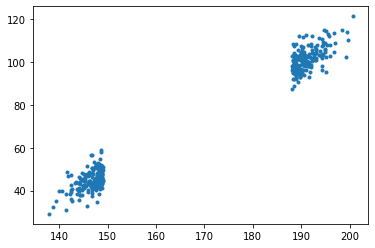

In [38]:
plt.plot(df_out['Height'],df_out['Weight'],'.')

In [39]:
df_notout=df[(df['Height']>min) & (df['Height']<max)]
from sklearn.linear_model import LinearRegression
model=LinearRegression()
x=np.array(df_notout['Height']).reshape(-1,1)
print(x)
y=df_notout['Weight']
#model.fit(x,y)

[[187.57142322]
 [174.70603628]
 [182.19668514]
 ...
 [162.22470022]
 [175.34697755]
 [157.33838453]]


In [46]:


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
regression_alg = LinearRegression()
regression_alg.fit(x_train, y_train)
test_predictions=regression_alg.predict(x_test)

# Calcul du coefficient de détermination R²
r2 = r2_score(y_test, test_predictions)

# Calcul de la précision et de l'exactitude (accuracy)
#accuracy = round((test_predictions == y_test).sum() / len(test_predictions), 3)
#print(accuracy)

# Affichage des résultats
print('Coefficient de détermination R² :', round(r2, 3))
#le R² mesure à quel point les valeurs prédites par le modèle sont proches des valeurs réelles

Coefficient de détermination R² : 0.834
Exactitude (Accuracy) : 0.0


In [ ]:
#with open('/content/model.pkl', 'wb') as file:
    #pickle.dump(model, file)

In [ ]:
#dump(model,'model.joblib')
